In [1]:
# this is an input-output file, which takes the fits file as an input and gives us a white image of the data cube by suming all the values of the wavelength axis
# importing the required libraries
from musetools import io as io
import matplotlib.pyplot as plt
from musetools import spec as s
import numpy as np
import getpass
from astropy.convolution import Gaussian2DKernel, convolve
from matplotlib import mlab, cm

from copy import deepcopy

%matplotlib inline
username=getpass.getuser()

if username == 'bordoloi':
	fitsfile = '/Users/bordoloi/Dropbox/MUSE/LensedArc/RCS0327_16mc_zap.fits'
else:
	fitsfile = '/home/ahmed/astro/data/RCS0327_16mc_zap.fits'
#input("Enter the path to your file: ")


wave, data, var, header = io.open_muse_cube(fitsfile)
#w = WCS(header)
zgal= 1.7037455
wrest = wave/(1.+zgal)

#spec, spec_err = s.extract_square(115, 237, wave, data, var, 5)
minwave = 7558.4#7090.     #7090.       #7555.
maxwave = 7563.7#7110.     #7110.       #7573.
ems_image = io.narrow_band(minwave, maxwave, wave, data,plot=False)
cont_min = 7645.#6930.
cont_max = 7650.5#6950.
cont_image = io.narrow_band(cont_min, cont_max, wave, data,plot=False)


residual_image=ems_image-cont_image

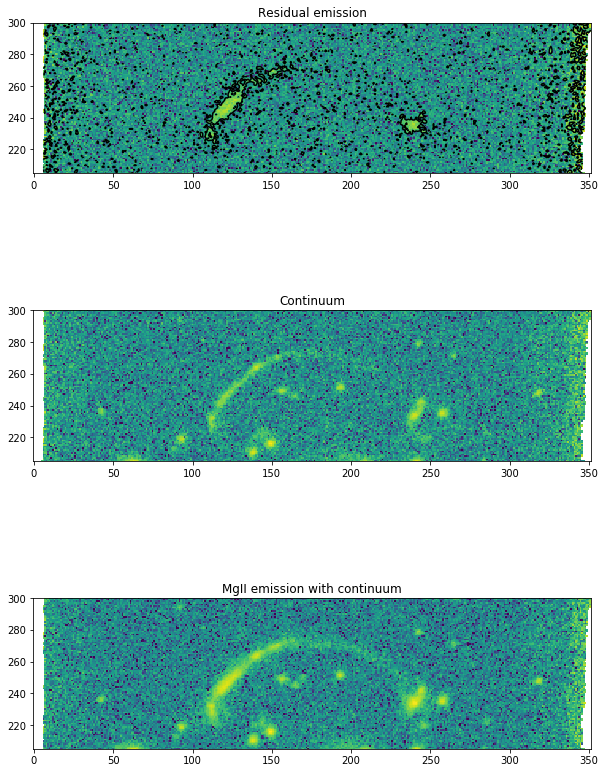

'\nThe z stretching for the color map\n'

In [2]:

'''
The z stretching for the color map
'''

zmin=-1
zmax=2.

width_in = 10
fig=plt.figure(1, figsize=(width_in, 15))
ax = fig.add_subplot(311)
ax.imshow(np.log10(np.abs( residual_image)), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
ax.contour(ems_image-cont_image,levels=np.logspace(1,3,3),colors='black')
ax.set_title('Residual emission')
ax.set_ylim([205,300])


ax1 = fig.add_subplot(312)
ax1.imshow(np.log10(np.abs(cont_image )), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
ax1.set_title('Continuum')
ax1.set_ylim([205,300])



ax2 = fig.add_subplot(313)
ax2.imshow(np.log10(np.abs(ems_image)), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
ax2.set_title('MgII emission with continuum')
ax2.set_ylim([205,300])
plt.show()

#fig = plt.figure()
'''
The z stretching for the color map
'''


In [15]:


# We smooth with a Gaussian kernel with stddev=2
# It is a 9x9 array
kernel = Gaussian2DKernel(x_stddev=1.4)
# create a "fixed" image with NaNs replaced by interpolated values
# astropy's convolution replaces the NaN pixels with a kernel-weighted
# interpolation from their neighbors
astropy_conv = convolve(residual_image, kernel)
mean_val=(np.mean(astropy_conv))
std_val=(np.std(astropy_conv))

sig_threshold=3.
qq=np.where((astropy_conv < sig_threshold*std_val))
qq_complement=np.where((astropy_conv >= sig_threshold*std_val))


ROI=deepcopy(residual_image)

ROI[qq]= 0.

#Now create a mask 
Mask=deepcopy(astropy_conv)
Mask[qq_complement]=1.
Mask[qq]=0.

Final_Image=1.+ROI*Mask


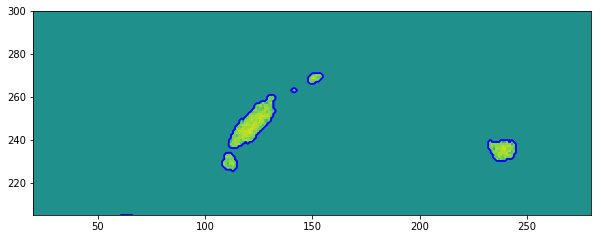

In [22]:




ydim, xdim = Final_Image.shape

zmin=-2
zmax=2.

x = np.arange(0., xdim, 1.)
y = np.arange(0., ydim, 1.)
X, Y = np.meshgrid(x, y)
levels = 0.+np.arange(1., 6.601, 2.8)  # Boost the upper limit to avoid truncation errors.
norm = cm.colors.Normalize(vmax=abs(Final_Image).max(), vmin=-abs(ROI).max())

width_in = 10
fig=plt.figure( figsize=(width_in, 15))
ax = fig.add_subplot(111)

lbg=ax.imshow(np.log10(np.abs(Final_Image)),cmap=plt.get_cmap('viridis'),origin="lower",vmin=zmin, vmax=zmax)
ax.set_ylim([205,300])
ax.set_xlim([20,280])



#CS = plt.contour(X, Y, lya_map,levels,norm=norm,cmap='plasma')
CS = plt.contour(X, Y, Final_Image,[0.9,1.5,2.],norm=norm,cmap='winter')


#p = CS.collections[0].get_paths()[0]
#v = p.vertices
#x = v[:,0]
#y = v[:,1]
#plt.plot(x,y,'r')
#plt.xlim(x1)
#plt.ylim(x2)





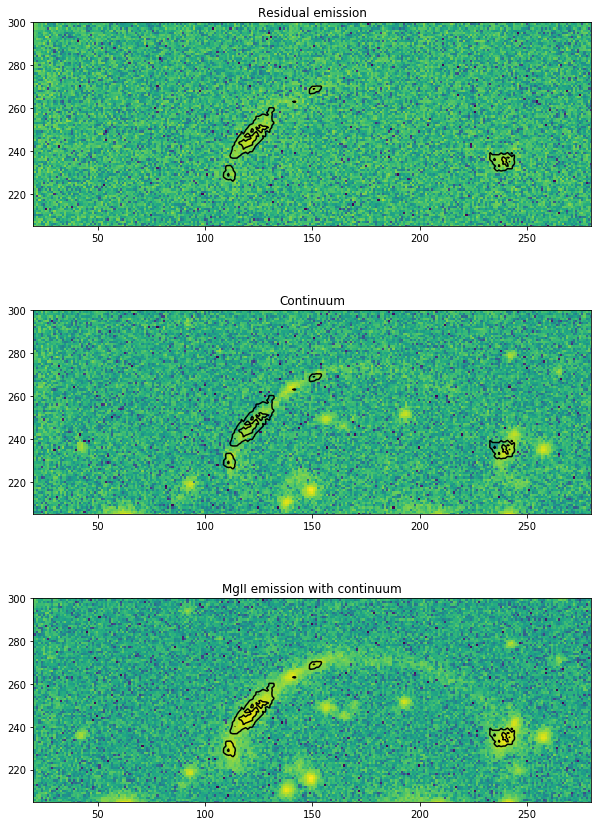

In [23]:


zmin=-2
zmax=2.

width_in = 10
fig=plt.figure(1, figsize=(width_in, 15))
ax = fig.add_subplot(311)
ax.imshow(np.log10(np.abs( residual_image)), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
CS = plt.contour(X, Y, np.log10(np.abs(Final_Image)),[0.9,1.5,2.],norm=norm,cmap='magma')
ax.set_title('Residual emission')
ax.set_ylim([205,300])
ax.set_xlim([20,280])


ax1 = fig.add_subplot(312)
ax1.imshow(np.log10(np.abs(cont_image )), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
CS = plt.contour(X, Y, np.log10(np.abs(Final_Image)),[0.9,1.5,2.],norm=norm,cmap='magma')

ax1.set_title('Continuum')
ax1.set_ylim([205,300])
ax1.set_xlim([20,280])



ax2 = fig.add_subplot(313)
ax2.imshow(np.log10(np.abs(ems_image)), cmap = plt.get_cmap('viridis'), origin='lower',vmin=zmin, vmax=zmax)
CS = plt.contour(X, Y, np.log10(np.abs(Final_Image)),[0.9,1.5,2.],norm=norm,cmap='magma')

ax2.set_title('MgII emission with continuum')
ax2.set_ylim([205,300])
ax2.set_xlim([20,280])

plt.show()
